<a href="https://colab.research.google.com/github/mhuertascompany/Saas-Fee/blob/main/hands-on/session1/hello_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib

from matplotlib import patches
from matplotlib import lines
import matplotlib.pyplot as plt
import pickle
from astropy.wcs import WCS 
from astropy.coordinates import SkyCoord
from astropy.nddata.utils import Cutout2D
import scipy.stats as stats
import sys
from scipy.ndimage import uniform_filter
from astropy.table import Table
from astropy.cosmology import Planck13
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import  BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp

from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score,auc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Intro ML Cycle1

# Acces this notebook @ https://github.com/mhuertascompany/Saas-Fee/tree/master/session1/hello_ANN.ipynb

- Notebook: intro_ML.ipynb

- Press "Open in Colab" button

- Open in PlayGround Mode

- Connect button (top right)

# Let's first generate some data...

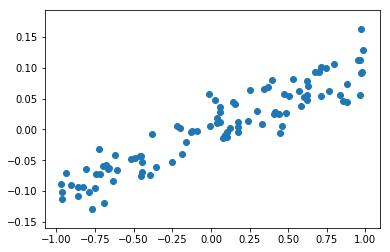

In [ ]:
x = np.random.uniform(-1,1,100)
y = 0.1*x+np.random.normal(0,0.025,100)
plt.scatter(x,y,label='data')
plt.legend()
plt.show()

# The normal way to deal with this, is through linear regression

[ 0.1036206  -0.00023876]


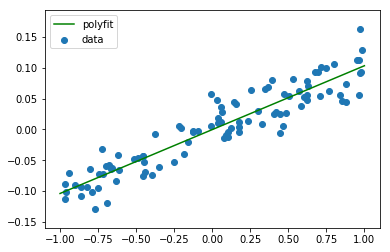

In [ ]:
res = np.polyfit(x,y,1)
print(res)
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.legend()
plt.show()

# Now, let's try to write the linear regression in a different way (more complicated way)

In [ ]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),      
tfkl.Dense(1, activation=None)])


The Dense command here, onnly says that the input is multiplied by a parameter $w$. We are effectively writing a simple model for our data: $y = w.a+b$, where $w$ is unknown.
![alt](https://drive.google.com/uc?id=1Rt2bNPCxaHXdjzmVS7TCw_u_Ur-WIqlW)

We can visualize the model we just created.

In [ ]:
ann.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 1)                 0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


 # We then compile

In [ ]:
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')

We are simply tht we want to minimize the mean square error (mse) between input and output. We call this the "loss function". So we are looking for the value of $w$ that minimizes the following expression: $$ \sum(x-w.x)^2$$

# And fit the model ...

In [ ]:
ann.fit(x,y,batch_size=1,epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 952us/step - loss: 0.0162
Epoch 2/20
100/100 [==============================] - 0s 718us/step - loss: 0.0081
Epoch 3/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4/20
100/100 [==============================] - 0s 713us/step - loss: 0.0018
Epoch 5/20
100/100 [==============================] - 0s 747us/step - loss: 9.4478e-04
Epoch 6/20
100/100 [==============================] - 0s 932us/step - loss: 6.7448e-04
Epoch 7/20
100/100 [==============================] - 0s 675us/step - loss: 6.0405e-04
Epoch 8/20
100/100 [==============================] - 0s 709us/step - loss: 5.8495e-04
Epoch 9/20
100/100 [==============================] - 0s 729us/step - loss: 5.8156e-04
Epoch 10/20
100/100 [==============================] - 0s 962us/step - loss: 5.8399e-04
Epoch 11/20
100/100 [==============================] - 0s 690us/step - loss: 5.8506e-04
Epoch 12/20
100/100 [==============================] - 0s 7

# Let's see what we got here...

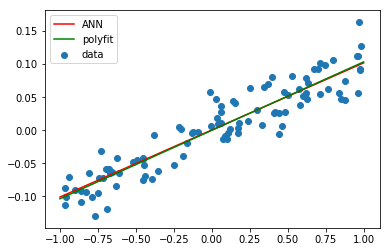

In [ ]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.legend()

We have performed a linear regression with and artifical neural network ! So, yes, linear regression IS also Machine Learning...

# But why is this useful ? 

Let's suppose we have a more complex dataset...

In [ ]:
x = np.random.uniform(-1,1,100)
y = 0.1*x+np.sin(2.5*x)+np.random.normal(0,0.2,100)

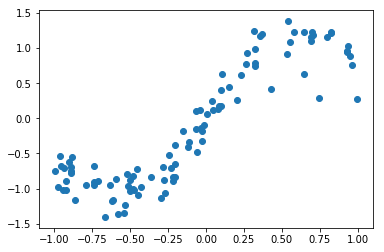

In [ ]:
plt.scatter(x,y)
plt.show()

# I can try again simple linear regression ...

[ 1.30004956 -0.00488377]


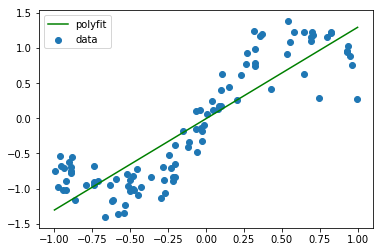

In [ ]:
res = np.polyfit(x,y,1)
print(res)
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.legend()
plt.show()

but that will not work super well as expected...

In [ ]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),      
tfkl.Dense(15, activation='sigmoid'),
tfkl.Dense(10, activation='sigmoid'),
tfkl.Dense(5, activation='relu'),
tfkl.Dense(1, activation=None)])
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=50)

Epoch 1/50
100/100 [==============================] - 0s 817us/step - loss: 0.7286
Epoch 2/50
100/100 [==============================] - 0s 802us/step - loss: 0.7089
Epoch 3/50
100/100 [==============================] - 0s 790us/step - loss: 0.6887
Epoch 4/50
100/100 [==============================] - 0s 977us/step - loss: 0.6708
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6497
Epoch 6/50
100/100 [==============================] - 0s 970us/step - loss: 0.6217
Epoch 7/50
100/100 [==============================] - 0s 996us/step - loss: 0.5875
Epoch 8/50
100/100 [==============================] - 0s 947us/step - loss: 0.5400
Epoch 9/50
100/100 [==============================] - 0s 821us/step - loss: 0.4906
Epoch 10/50
100/100 [==============================] - 0s 915us/step - loss: 0.4246
Epoch 11/50
100/100 [==============================] - 0s 950us/step - loss: 0.3658
Epoch 12/50
100/100 [==============================] - 0s 1ms/step - loss: 0.2968
Epoch

# Let's go back to our complicated ANN ...

In [ ]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),      
tfkl.Dense(1, activation=None)])
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=50)

Epoch 1/50
100/100 [==============================] - 0s 878us/step - loss: 0.1715
Epoch 2/50
100/100 [==============================] - 0s 853us/step - loss: 0.1689
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 4/50
100/100 [==============================] - 0s 757us/step - loss: 0.1651
Epoch 5/50
100/100 [==============================] - 0s 767us/step - loss: 0.1639
Epoch 6/50
100/100 [==============================] - 0s 770us/step - loss: 0.1631
Epoch 7/50
100/100 [==============================] - 0s 771us/step - loss: 0.1622
Epoch 8/50
100/100 [==============================] - ETA: 0s - loss: 0.149 - 0s 930us/step - loss: 0.1616
Epoch 9/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1610
Epoch 10/50
100/100 [==============================] - 0s 910us/step - loss: 0.1608
Epoch 11/50
100/100 [==============================] - 0s 944us/step - loss: 0.1603
Epoch 12/50
100/100 [==============================] - 0s 883us/s

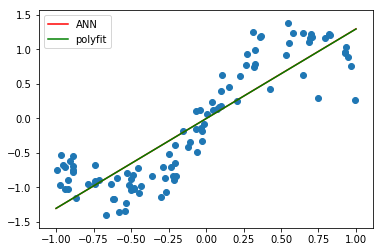

In [ ]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y)
plt.legend()

If I do not change anything, I will obtain the same result. My model is simply linear...

# Let's add a bit of non-linearity ...

In [ ]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),      
tfkl.Dense(1, activation='sigmoid')])


The sigmoid function is given by this expression: $$ \frac{1}{1+e^{-x}}$$
So our model is now like this:![alt](https://drive.google.com/uc?id=1-2VbatzRnqGJMKCga-tppiTo6iPRBr9s)
This is what we call a perceptron. The non-linear function added after the linear combination is also called the activation function, because "it fires the unit".

In [ ]:
ann.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 1)                 0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=50)

Epoch 1/50
100/100 [==============================] - 0s 994us/step - loss: 0.8295
Epoch 2/50
100/100 [==============================] - 0s 781us/step - loss: 0.8033
Epoch 3/50
100/100 [==============================] - 0s 758us/step - loss: 0.7793
Epoch 4/50
100/100 [==============================] - 0s 730us/step - loss: 0.7579
Epoch 5/50
100/100 [==============================] - 0s 768us/step - loss: 0.7385
Epoch 6/50
100/100 [==============================] - 0s 753us/step - loss: 0.7211
Epoch 7/50
100/100 [==============================] - 0s 743us/step - loss: 0.7052
Epoch 8/50
100/100 [==============================] - 0s 742us/step - loss: 0.6910
Epoch 9/50
100/100 [==============================] - 0s 761us/step - loss: 0.6780
Epoch 10/50
100/100 [==============================] - 0s 845us/step - loss: 0.6661
Epoch 11/50
100/100 [==============================] - 0s 853us/step - loss: 0.6554
Epoch 12/50
100/100 [==============================] - 0s 788us/step - loss: 0.6456
E

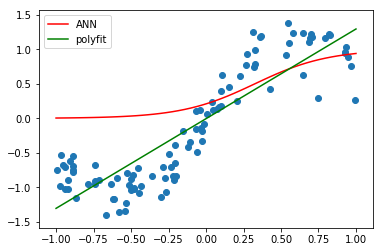

In [ ]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y)
plt.legend()

Still not great, but there is some potential !?

# We are going to work a bit more on the model

In [ ]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),      
tfkl.Dense(1, activation='sigmoid'),
tfkl.Dense(1, activation=None)])


We have added "a layer". Our model is now: $$ y=(\frac{1}{1+e^{-(w_1.x)}}).w_2$$
![alt](https://drive.google.com/uc?id=1E0iobni7jhUI2jfGKPb081OM_QDB5Hjg)

In [ ]:
ann.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 1)                 0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=50)

Epoch 1/50
100/100 [==============================] - 0s 967us/step - loss: 0.7318
Epoch 2/50
100/100 [==============================] - 0s 804us/step - loss: 0.7168
Epoch 3/50
100/100 [==============================] - 0s 791us/step - loss: 0.7027
Epoch 4/50
100/100 [==============================] - 0s 741us/step - loss: 0.6899
Epoch 5/50
100/100 [==============================] - 0s 859us/step - loss: 0.6774
Epoch 6/50
100/100 [==============================] - 0s 772us/step - loss: 0.6642
Epoch 7/50
100/100 [==============================] - 0s 868us/step - loss: 0.6517
Epoch 8/50
100/100 [==============================] - 0s 845us/step - loss: 0.6386
Epoch 9/50
100/100 [==============================] - 0s 832us/step - loss: 0.6251
Epoch 10/50
100/100 [==============================] - 0s 897us/step - loss: 0.6119
Epoch 11/50
100/100 [==============================] - 0s 786us/step - loss: 0.5975
Epoch 12/50
100/100 [==============================] - 0s 761us/step - loss: 0.5837
E

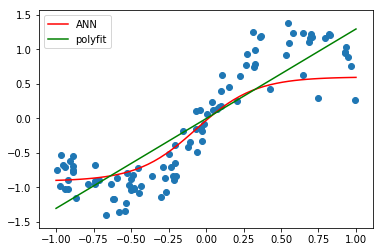

In [ ]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y)
plt.legend()

Not fantastic, but getting better...You have just created your first ANN for regression!

In fact, it turns out that it exists a mathematical theorem that proves that NNs are optimal approximators: 


FOR ANY CONTINUOS FUNCTION FOR A HYPERCUBE [0,1]d TO REAL NUMBERS, AND EVERY POSITIVE EPSILON, THERE EXISTS A SIGMOID BASED 1-HIDDEN LAYER NEURAL NETWORK THAT OBTAINES AT MOST EPSILON ERROR IN FUNCTIONAL SPACE - Cybenko+89

“BIG ENOUGH NETWORK CAN APPROXIMATE, BUT NOT REPRESENT ANY SMOOTH FUNCTION. THE MATH DEMONSTRATION IMPLIES SHOWING THAT NETWORS ARE DENSE IN THE SPACE OF TARGET FUNCTIONS”

So, the approximation theorem tells me that there exists a NN that can approximate any function. It does not tell me which one: this is the alchemia of ML. It does not tell me how to minimize it either!

# Let's then try to improve it...anyway.

In [ ]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),      
tfkl.Dense(10, activation='sigmoid'),
tfkl.Dense(1, activation=None)])

In [ ]:
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=100)

Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 0.1310
Epoch 2/100
100/100 [==============================] - 0s 741us/step - loss: 0.1300
Epoch 3/100
100/100 [==============================] - 0s 755us/step - loss: 0.1296
Epoch 4/100
100/100 [==============================] - 0s 737us/step - loss: 0.1288
Epoch 5/100
100/100 [==============================] - 0s 746us/step - loss: 0.1285
Epoch 6/100
100/100 [==============================] - 0s 708us/step - loss: 0.1278
Epoch 7/100
100/100 [==============================] - 0s 734us/step - loss: 0.1279
Epoch 8/100
100/100 [==============================] - 0s 751us/step - loss: 0.1276
Epoch 9/100
100/100 [==============================] - 0s 742us/step - loss: 0.1266
Epoch 10/100
100/100 [==============================] - 0s 908us/step - loss: 0.1269
Epoch 11/100
100/100 [==============================] - 0s 983us/step - loss: 0.1277
Epoch 12/100
100/100 [==============================] - 0s 864us/step - loss

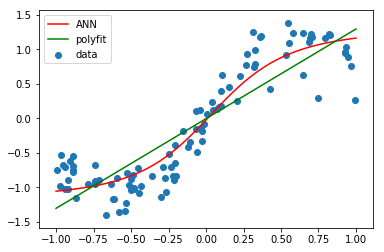

In [ ]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y,label='data')
plt.legend()

Which is not that far from the real underlying model...

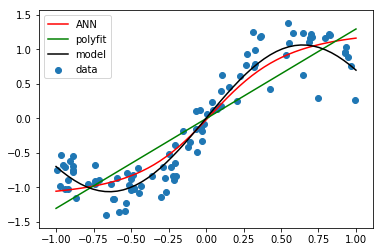

In [ ]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(2.5*np.linspace(-1,1)),label='model',color='black')
plt.legend()

Does it mean I can do any arbitrarily complex network and I still will be able to optimize over it? Yes! The answer is the backpropagation algorithm (Rumelhart et al., 1986a). 

So this is it? If I add a lot of different layers, am I doing Deep Learning? 

Well, not yet ... deep learning implies also feautre learning, which we have not touched here. However, the framework is the same

# What about errors? Can we capture the uncertainties in the data?

In [ ]:

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),      
tfkl.Dense(10, activation='sigmoid'),
tfkl.Dense(tfpl.IndependentNormal.params_size(1),activation=None),
tfpl.IndependentNormal(1, tfd.Normal.sample)])


Wow! What's that? We are transforming our model into a probabilsiitc model. Our model now predicts a Normal pdf at every point. We are going to learn the mean and the stanrdarde deviation of the pdf. That way, we let the model capture not only the mean but also the uncertainity.

So now, let's compile this model. Since the output of the network is now a distribution, we are going to maximize the likelihood, or minimize the negative log likelihood.

In [ ]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss=negloglik)
ann.fit(x,y,batch_size=1,epochs=400)

Epoch 1/200
100/100 [==============================] - 0s 770us/step - loss: -0.0163
Epoch 2/200
100/100 [==============================] - 0s 784us/step - loss: -0.0146
Epoch 3/200
100/100 [==============================] - 0s 908us/step - loss: -0.0203
Epoch 4/200
100/100 [==============================] - 0s 846us/step - loss: -0.0191
Epoch 5/200
100/100 [==============================] - 0s 833us/step - loss: -0.0209
Epoch 6/200
100/100 [==============================] - 0s 771us/step - loss: -0.0252
Epoch 7/200
100/100 [==============================] - 0s 822us/step - loss: -0.0249
Epoch 8/200
100/100 [==============================] - 0s 822us/step - loss: -0.0313
Epoch 9/200
100/100 [==============================] - 0s 914us/step - loss: -0.0323
Epoch 10/200
100/100 [==============================] - 0s 964us/step - loss: -0.0185
Epoch 11/200
100/100 [==============================] - 0s 960us/step - loss: -0.0252
Epoch 12/200
100/100 [==============================] - 0s 866u

# Let's plot the results ...

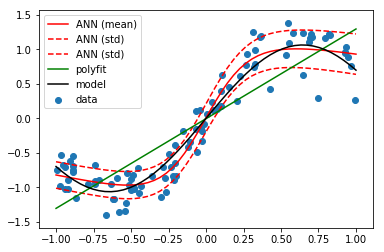

In [ ]:
xp = np.linspace(-1,1)
yp = ann(xp).mean()
yp_std = ann(xp).stddev()
plt.plot(xp,yp,color='red',label='ANN (mean)')
plt.plot(xp,yp+yp_std,color='red',label='ANN (std)',ls='--')
plt.plot(xp,yp-yp_std,color='red',label='ANN (std)',ls='--')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(2.5*np.linspace(-1,1)),label='model',color='black')
plt.legend()


The model captures now that it is more uncertain towrds the edges of the distribution...